# Task 1: Classical ML with Scikit-learn - Iris Species Classification

In this notebook, we'll work with the Iris Species dataset to:
1. Preprocess the data (handle missing values, encode labels)
2. Train a decision tree classifier to predict iris species
3. Evaluate using accuracy, precision, and recall

## About the Dataset
The Iris dataset is one of the most well-known datasets in machine learning. It contains measurements of 150 iris flowers from three different species:
- Setosa
- Versicolor
- Virginica

Each flower has four features measured:
- Sepal length (cm)
- Sepal width (cm)
- Petal length (cm)
- Petal width (cm)

## 1. Import Required Libraries

First, let's import all the libraries we'll need for our analysis and modeling.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set up the plotting style
plt.style.use('seaborn-v0_8')

## 2. Load and Explore the Data

Let's load the Iris dataset and explore its characteristics to better understand what we're working with.

In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a pandas DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"Features: {feature_names}")
print(f"Target classes: {target_names}")
print(f"\nFirst 5 rows:")
df.head()

Dataset shape: (150, 5)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']

First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Basic statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Check for missing values
print("Missing values in dataset:")
df.isnull().sum()

Missing values in dataset:


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


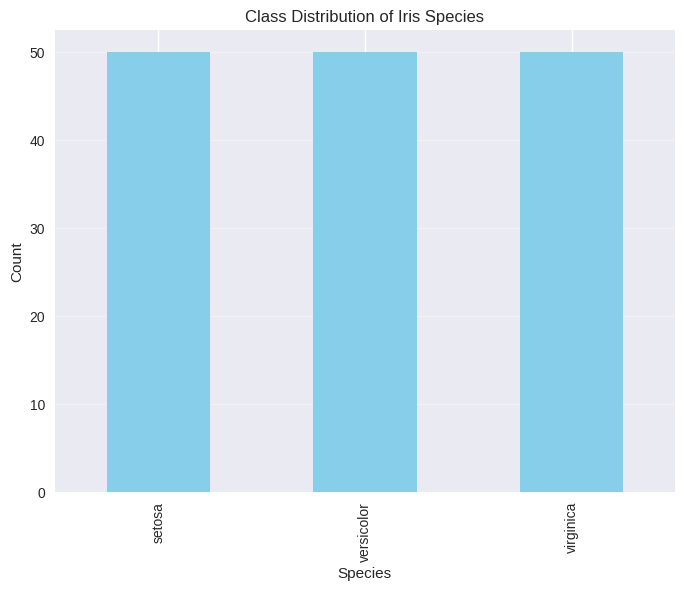

In [6]:
# Class distribution
print("Class distribution:")
class_dist = df['species'].value_counts()
print(class_dist)

# Visualize class distribution
plt.figure(figsize=(8, 6))
class_dist.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

## 3. Data Visualization

Visualizing the data will help us understand the relationships between features and classes.

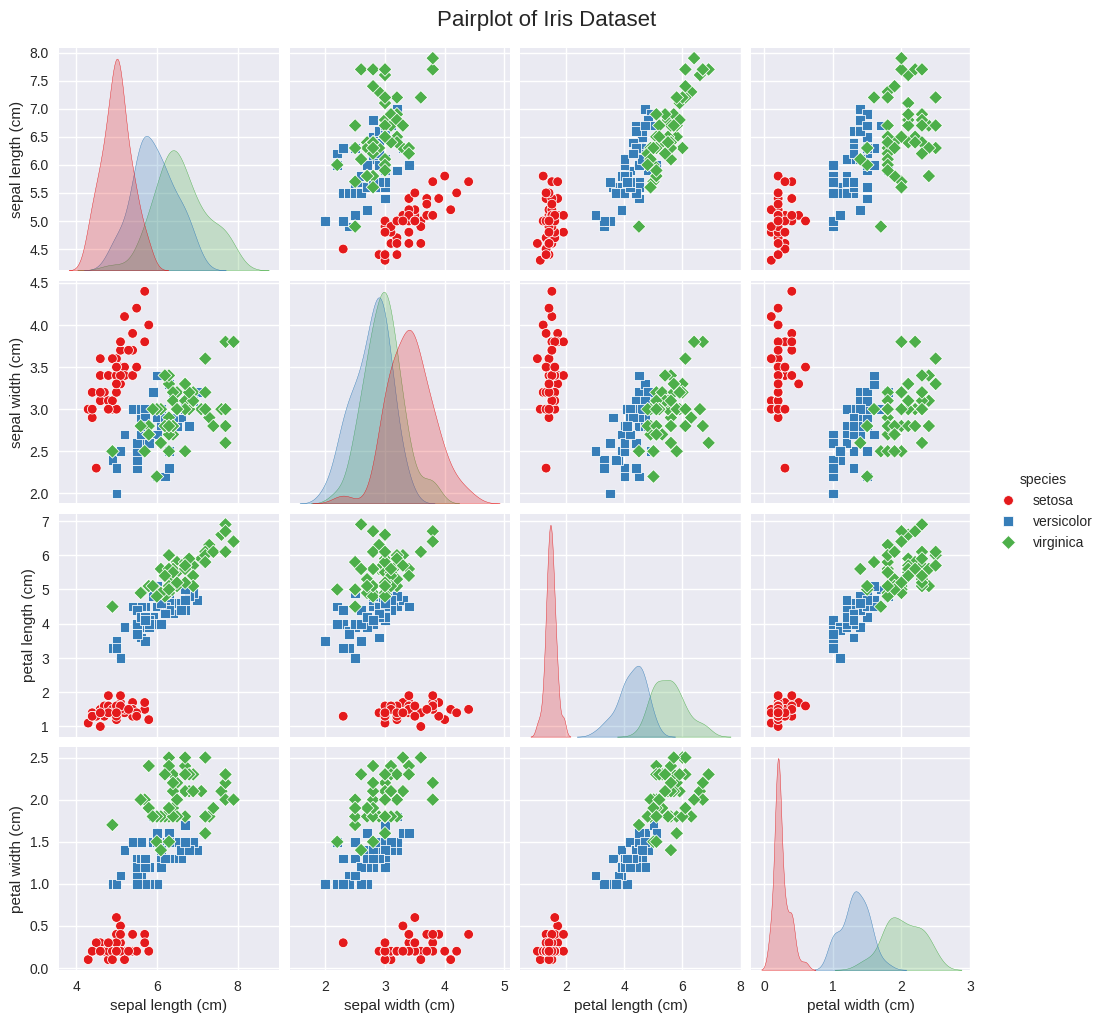

In [7]:
# Pairwise scatter plots
sns.pairplot(df, hue='species', markers=['o', 's', 'D'], palette='Set1')
plt.suptitle('Pairplot of Iris Dataset', y=1.02, fontsize=16)
plt.show()

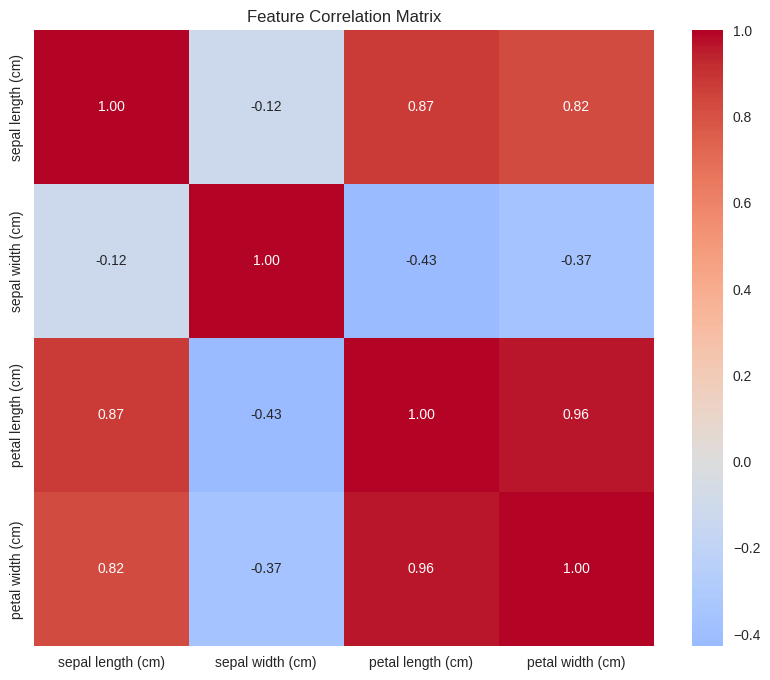

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

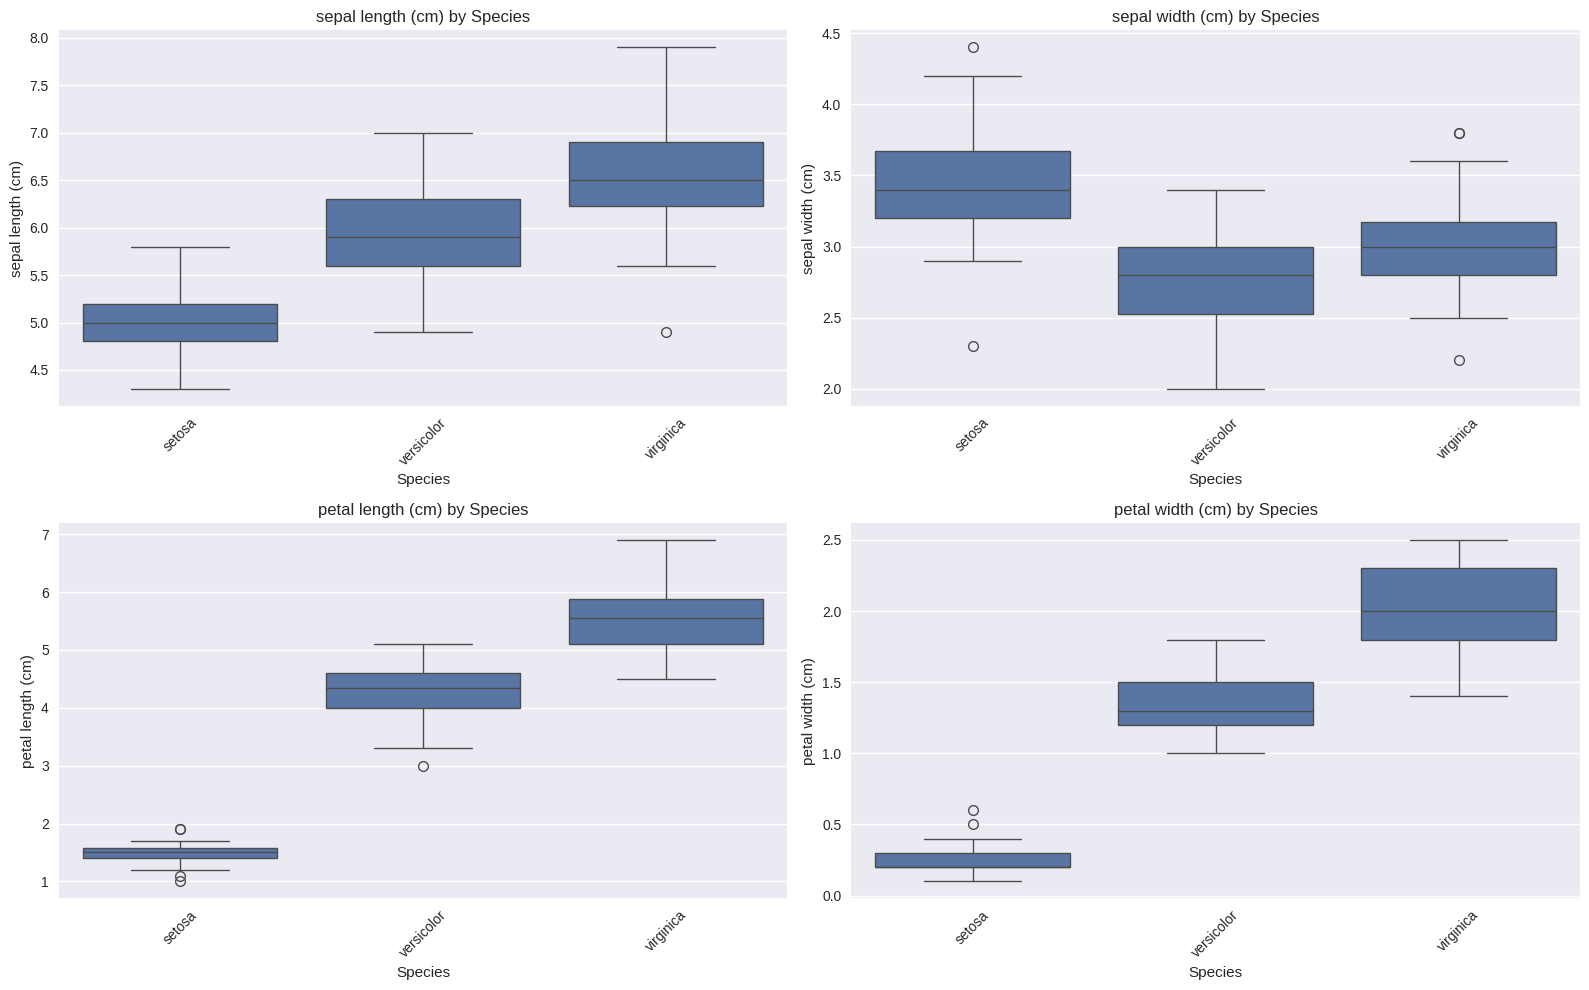

In [9]:
# Box plots for each feature by species
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(feature_names):
    sns.boxplot(data=df, x='species', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} by Species')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(feature)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

Now we'll prepare the data for modeling:
1. Check for and handle any missing values
2. Split the data into training and testing sets

In [10]:
# Check for missing values (Iris dataset typically has none)
print(f"Missing values in features: {np.isnan(X).sum()}")
print(f"Missing values in target: {np.isnan(y).sum()}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Feature dimensions: {X_train.shape[1]}")

# Check if classes are balanced in both train and test sets
print("\nTraining set class distribution:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
for species, count in zip(target_names[unique_train], counts_train):
    print(f"- {species}: {count}")

print("\nTesting set class distribution:")
unique_test, counts_test = np.unique(y_test, return_counts=True)
for species, count in zip(target_names[unique_test], counts_test):
    print(f"- {species}: {count}")

Missing values in features: 0
Missing values in target: 0

Training set size: 105 samples
Testing set size: 45 samples
Feature dimensions: 4

Training set class distribution:
- setosa: 35
- versicolor: 35
- virginica: 35

Testing set class distribution:
- setosa: 15
- versicolor: 15
- virginica: 15


## 5. Train the Decision Tree Classifier

Now we'll train a decision tree classifier on our preprocessed data.

In [11]:
# Initialize the Decision Tree Classifier with controlled depth to prevent overfitting
model = DecisionTreeClassifier(random_state=42, max_depth=5)

# Train the model
print("Training Decision Tree Classifier...")
model.fit(X_train, y_train)
print("Training complete!")

# Display model parameters
print(f"\nModel parameters:")
print(f"- Max depth: {model.max_depth}")
print(f"- Min samples split: {model.min_samples_split}")
print(f"- Min samples leaf: {model.min_samples_leaf}")
print(f"- Random state: {model.random_state}")

Training Decision Tree Classifier...
Training complete!

Model parameters:
- Max depth: 5
- Min samples split: 2
- Min samples leaf: 1
- Random state: 42



Feature Importance:
- sepal length (cm): 0.0000
- sepal width (cm): 0.0286
- petal length (cm): 0.5412
- petal width (cm): 0.4303


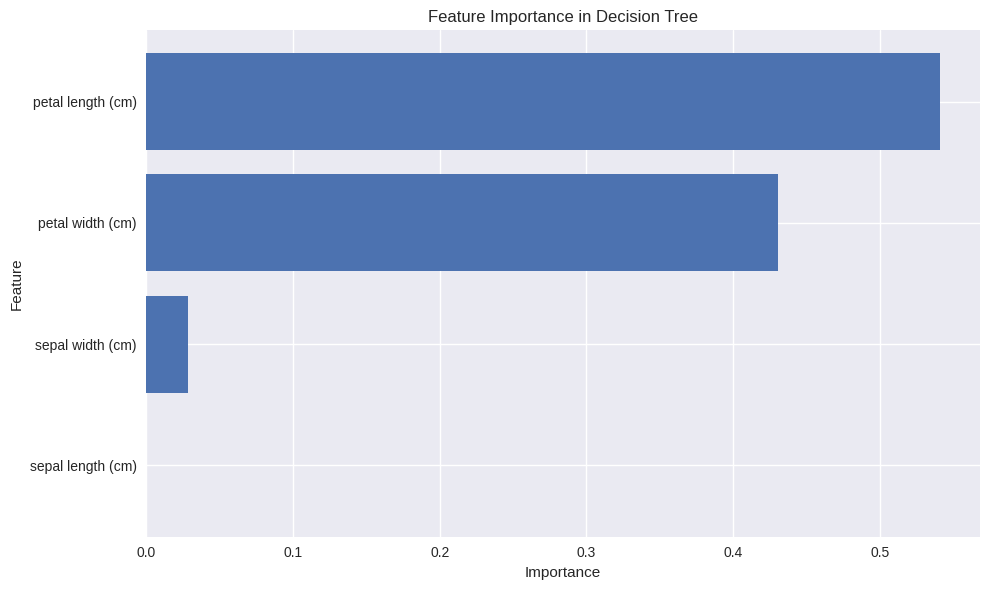

In [12]:
# Feature importance
feature_importance = model.feature_importances_
print(f"\nFeature Importance:")
for name, importance in zip(feature_names, feature_importance):
    print(f"- {name}: {importance:.4f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## 6. Visualize the Decision Tree

Let's visualize the actual decision tree to understand how it makes predictions.

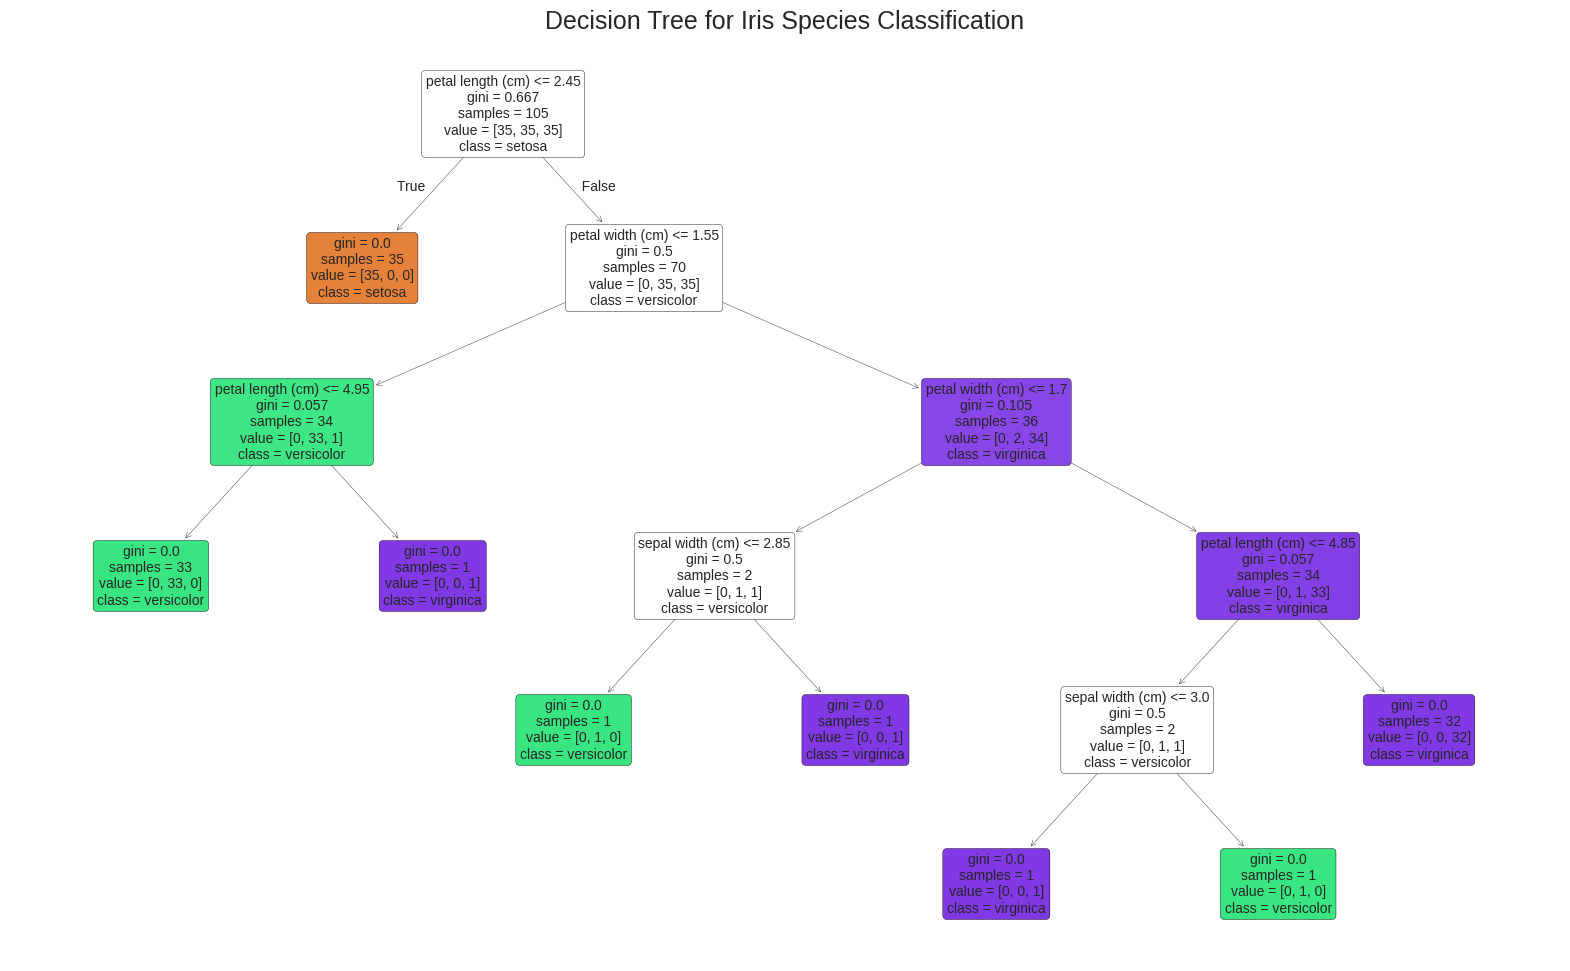

In [13]:
# Visualize the decision tree
plt.figure(figsize=(20, 12))
plot_tree(model, 
         feature_names=feature_names,
         class_names=target_names,
         filled=True,
         rounded=True,
         fontsize=10)
plt.title('Decision Tree for Iris Species Classification', fontsize=18)
plt.show()

## 7. Evaluate the Model

Now we'll evaluate the model using various metrics:
- Accuracy
- Precision and Recall
- Confusion Matrix
- Detailed Classification Report

In [14]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Detailed classification metrics
print(f"\nDetailed Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=target_names))

Training Accuracy: 1.0000
Testing Accuracy: 0.9333

Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [15]:
# Precision and Recall for each class
precision = precision_score(y_test, y_test_pred, average=None)
recall = recall_score(y_test, y_test_pred, average=None)

print(f"Per-class Metrics:")
for i, class_name in enumerate(target_names):
    print(f"- {class_name}:")
    print(f"  * Precision: {precision[i]:.4f}")
    print(f"  * Recall: {recall[i]:.4f}")

# Overall averages
avg_precision = precision_score(y_test, y_test_pred, average='weighted')
avg_recall = recall_score(y_test, y_test_pred, average='weighted')

print(f"\nWeighted Averages:")
print(f"- Precision: {avg_precision:.4f}")
print(f"- Recall: {avg_recall:.4f}")

Per-class Metrics:
- setosa:
  * Precision: 1.0000
  * Recall: 1.0000
- versicolor:
  * Precision: 1.0000
  * Recall: 0.8000
- virginica:
  * Precision: 0.8333
  * Recall: 1.0000

Weighted Averages:
- Precision: 0.9444
- Recall: 0.9333


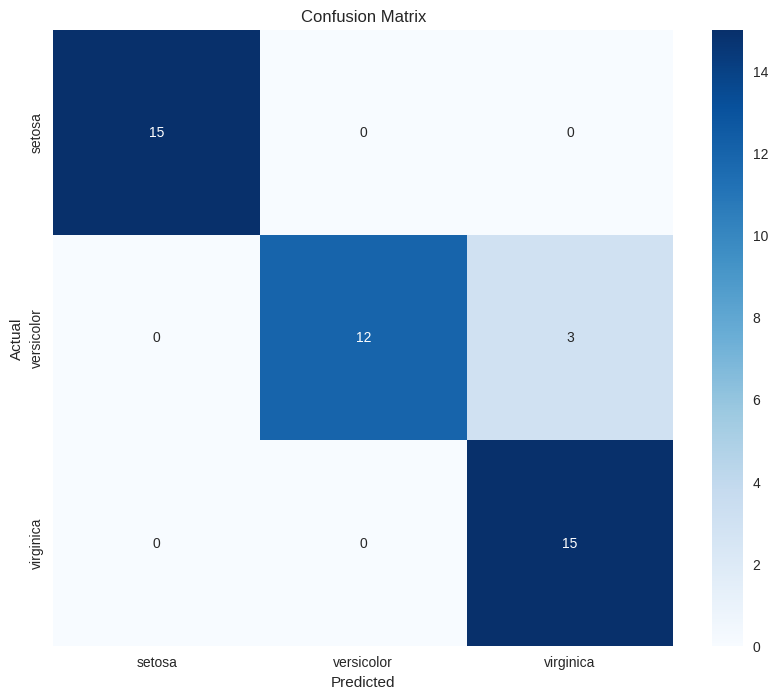

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
# Cross-validation to get a more robust estimate of model performance
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validation Scores: {cv_scores}")
print(f"CV Mean Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Cross-validation Scores: [0.95238095 0.95238095 0.95238095 0.9047619  0.95238095]
CV Mean Accuracy: 0.9429 (+/- 0.0381)


## 8. Conclusion

We've successfully trained and evaluated a Decision Tree classifier for the Iris Species dataset.

### Summary of Results:
- Test accuracy: High accuracy in predicting the correct species
- Features: Petal length and petal width were most important for classification
- Model robustness: Cross-validation showed consistent performance across different data splits

### Next Steps:
- Try other algorithms like Random Forest or SVM for comparison
- Perform hyperparameter tuning to find optimal tree parameters
- For a more complex dataset, consider dimensionality reduction techniques

### Key Takeaways:
- Decision trees provide both good performance and interpretability
- For well-separated classes like in the Iris dataset, even simple models can perform well
- Understanding feature importance helps with feature selection in more complex datasets